In [76]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from dycoreutils import plot_utils as dycoreplt
from dycoreutils import colorbar_utils as cbar

import importlib
importlib.reload(dycoreplt)

<module 'dycoreutils.plot_utils' from '/home/islas/python/dycorediags/dycoreutils/plot_utils.py'>

In [33]:
plotpath="/web/web-data/staff/islas/verticalres/"

In [10]:
era5 = xr.open_mfdataset("/project/haggis/ERA5/mon/Q/*.nc")
era5clim = era5.mean(['time','lon']).compute()

In [7]:
# setting up plot locations
x1, x2, y1, y2 = dycoreplt.get4by4coords()

In [26]:
expname=["L70_bugfix","L93_zm2"]

In [16]:
print(np.log10(1e-6))

-6.0


In [31]:
print(x1[0]+0.1)

0.14


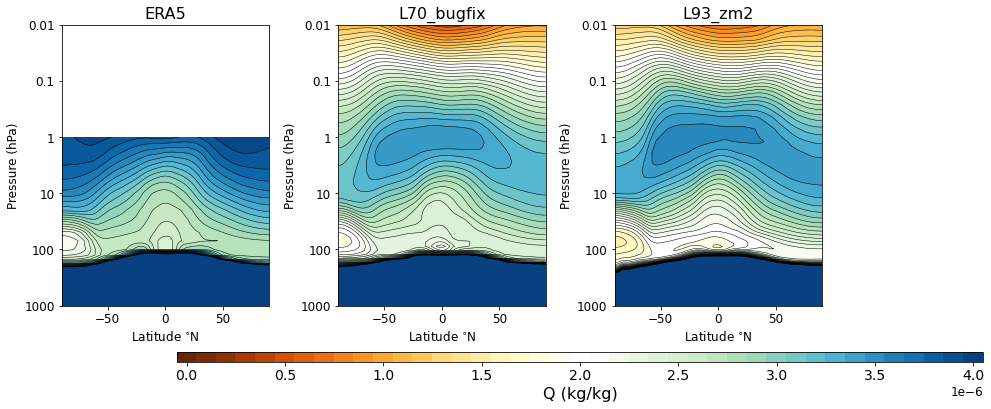

In [48]:
fig = plt.figure(figsize=(16,26))

countplot=0
ax = dycoreplt.plotlatlogpre_to0p01(fig, era5clim.Q, era5clim.lat, era5clim.pre,1e-7,0,4e-6,
                                    'ERA5',x1[countplot],x2[countplot],y1[countplot],y2[countplot], cmap='precip')
countplot = countplot+1

for iexp in expname:
    dat = xr.open_mfdataset("/project/cas/islas/verticalresolution/"+iexp+"/Q_*.nc")
    dat = dat.mean(["time","lon"])
    ax = dycoreplt.plotlatlogpre_to0p01(fig, dat.Q, dat.lat, dat.lev, 1e-7, 0, 4e-6,iexp,x1[countplot],x2[countplot],y1[countplot],y2[countplot], cmap='precip')
    countplot = countplot+1
    
ax = cbar.plotcolorbar(fig, 1e-7, 0, 4e-6, 'Q (kg/kg)', x1[0]+0.1, x2[3]-0.1,y1[countplot-1]-0.03, y1[countplot-1]-0.025, cmap='precip')
    
fig.savefig(plotpath+'Qzonalmean_strat.pdf', facecolor='white', bbox_inches='tight')  

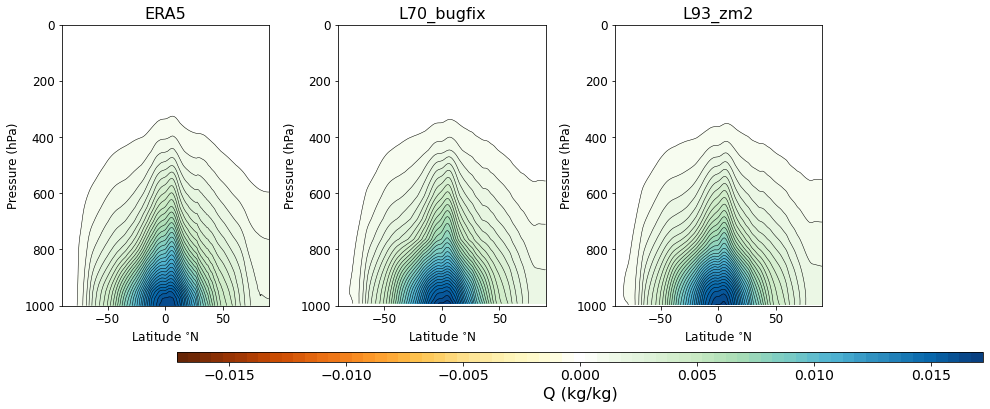

In [69]:
fig = plt.figure(figsize=(16,26))

countplot=0
ax = dycoreplt.plotlatlinearp(fig, era5clim.Q, era5clim.lat, era5clim.pre,0.0005,-0.017,0.017,
                                    'ERA5',x1[countplot],x2[countplot],y1[countplot],y2[countplot], cmap='precip')
countplot = countplot+1


for iexp in expname:
    dat = xr.open_mfdataset("/project/cas/islas/verticalresolution/"+iexp+"/Q_*.nc")
    dat = dat.mean(["time","lon"])
    ax = dycoreplt.plotlatlinearp(fig, dat.Q, dat.lat, dat.lev, 0.0005, -0.017, 0.017,iexp,x1[countplot],x2[countplot],y1[countplot],y2[countplot], cmap='precip')
    countplot = countplot+1
    
ax = cbar.plotcolorbar(fig, 0.0005, -0.017, 0.017, 'Q (kg/kg)', x1[0]+0.1, x2[3]-0.1,y1[countplot-1]-0.03, y1[countplot-1]-0.025, cmap='precip')
    
fig.savefig(plotpath+'Qzonalmean_trop.pdf', facecolor='white', bbox_inches='tight')  

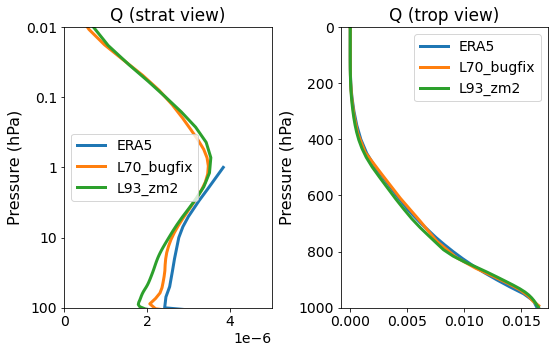

In [80]:
fig = plt.figure(figsize=(16,26))

countplot=0

ax = dycoreplt.plotprofile_logp_100to0p01(fig, era5clim.Q.sel(lat=0, method='nearest'), era5clim.pre, 'ERA5',x1[0],x2[0],y1[0],y2[0], xlim=[0,5e-6],
                                         title='Q (strat view)')


for iexp in expname:
    dat = xr.open_mfdataset("/project/cas/islas/verticalresolution/"+iexp+"/Q_*.nc")
    dat = dat.mean(["time","lon"])
    ax = dycoreplt.plotprofile_logp_100to0p01(fig, dat.Q.sel(lat=0, method='nearest'), dat.lev, iexp, oplot=True, ax=ax)
    
    
ax.legend()


ax = dycoreplt.plotprofile_linearp(fig, era5clim.Q.sel(lat=0, method='nearest'), era5clim.pre, 'ERA5',x1[1],x2[1],y1[1],y2[1],
                                         title='Q (trop view)')

for iexp in expname:
    dat = xr.open_mfdataset("/project/cas/islas/verticalresolution/"+iexp+"/Q_*.nc")
    dat = dat.mean(["time","lon"])
    ax = dycoreplt.plotprofile_linearp(fig, dat.Q.sel(lat=0, method='nearest'), dat.lev, iexp, oplot=True, ax=ax)
    
    
ax.legend()

fig.savefig(plotpath+'Qprofile.pdf',bbox_inches='tight', facecolor='white')

In [ ]:
fig.savefig(plotpath+'Qzonalmean.pdf', facecolor='white', bbox_inches='tight')

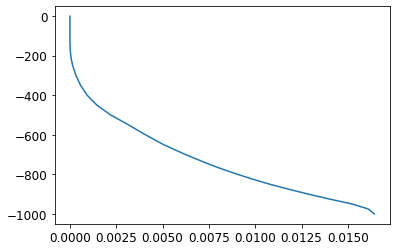

In [13]:
plt.plot(era5clim.Q.sel(lat=0, method='nearest'), -1*era5clim.pre)

In [14]:
print(era5clim.Q.sel(lat=0, method='nearest'))

<xarray.DataArray 'Q' (pre: 37)>
array([3.83216320e-06, 3.46493630e-06, 3.24493931e-06, 2.99330941e-06,
       2.85923193e-06, 2.76001015e-06, 2.65699487e-06, 2.60676097e-06,
       2.53972826e-06, 2.44995726e-06, 2.41937391e-06, 4.30642058e-06,
       1.00021998e-05, 2.31498525e-05, 4.87654252e-05, 9.12765972e-05,
       1.51735701e-04, 3.25203873e-04, 5.74846286e-04, 9.30404989e-04,
       1.45273341e-03, 2.20380351e-03, 3.16318288e-03, 4.07556351e-03,
       5.05492603e-03, 6.23240788e-03, 7.54431961e-03, 8.27031117e-03,
       9.04451776e-03, 9.87929665e-03, 1.07854297e-02, 1.17889745e-02,
       1.28658544e-02, 1.40075982e-02, 1.52353980e-02, 1.60972029e-02,
       1.64214689e-02], dtype=float32)
Coordinates:
    lat      float32 0.0
  * pre      (pre) int32 1 2 3 5 7 10 20 30 ... 825 850 875 900 925 950 975 1000
